In [72]:
import pandas as pd
pd.set_option('display.max_columns', None)



# Load the Parquet file
file_path = '../kaggle/train.parquet/partition_id=4/part-0.parquet'
data = pd.read_parquet(file_path)
data

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,680,0,0,2.298160,0.851814,1.197591,0.219422,0.411698,2.057359,-0.542597,-3.433100,-1.090165,0.151888,11,7,76,-0.971420,0.670215,-0.502896,NaN,-0.070096,NaN,-1.308236,-2.120128,1.747068,-0.219661,0.791602,0.114922,-0.311672,0.156548,1.476346,1.301341,1.235173,-0.259882,-0.301250,-0.264237,NaN,NaN,0.354569,0.039748,-1.682977,0.303373,0.427266,NaN,0.517866,NaN,NaN,-1.088946,NaN,-1.543409,0.809453,-2.679432,-1.730216,-1.349158,NaN,0.322135,NaN,NaN,-2.273168,NaN,-1.627507,1.155271,NaN,-3.847984,-2.230864,-0.171579,-0.273791,-0.301876,-0.432933,-1.215778,-1.670469,-0.637963,0.803874,-0.212690,-0.764702,0.435278,-0.619145,NaN,NaN,-0.021034,-0.045094,-0.178144,-0.195100,-0.304665,0.164485,-0.205231,0.191064,-1.413209,0.375675,0.929775,-1.574939,1.101371
1,680,0,1,3.928745,0.534441,1.079740,0.038748,0.275343,2.135057,-0.541966,-2.774344,-1.048089,0.163768,11,7,76,-0.873847,1.794426,-0.226819,NaN,-0.328627,NaN,-0.870575,-1.204292,0.935869,-0.064365,1.273109,0.752816,-0.062281,0.687036,0.546603,1.229373,1.535235,-0.483758,-0.431013,-0.058963,NaN,NaN,0.946928,0.835052,0.879841,0.133808,0.073910,NaN,0.207950,NaN,NaN,-1.063433,NaN,-1.687322,1.475159,-0.946082,-0.245348,-0.320477,NaN,0.505224,NaN,NaN,-1.074216,NaN,-1.909605,1.566016,NaN,-1.044804,-0.807186,-0.171579,-0.466983,-0.250124,-0.342297,-1.896279,-2.157645,-0.698755,1.743311,-0.069648,-0.933445,1.653637,-0.348816,NaN,NaN,-0.154413,-0.301091,-0.266495,-0.470271,0.089769,0.011395,0.092348,0.473781,0.397024,0.777026,0.826995,0.569681,1.986971
2,680,0,2,1.340433,-0.227643,0.764146,-0.243349,0.247027,2.347248,-0.478477,-2.660244,-1.261613,0.234425,81,2,59,-0.952889,-0.048060,-0.791763,NaN,-0.140953,NaN,-1.691419,-2.242023,-0.459649,-0.241993,-0.471080,-1.056603,-0.387841,-0.408962,0.359514,0.707161,0.669771,-0.641928,-0.645097,-0.362472,NaN,NaN,-2.537107,-2.431731,2.210761,-0.050639,0.103587,NaN,2.064718,NaN,NaN,1.097977,NaN,-0.339884,1.743191,-1.415999,7.039961,2.292301,NaN,2.115924,NaN,NaN,0.095438,NaN,-0.664823,2.016616,NaN,2.085358,0.690842,-0.171579,0.022096,-0.018111,-0.015769,-2.270972,-1.826189,-0.908704,-0.051331,-0.658539,-1.011692,-0.008993,-0.363811,NaN,NaN,1.677642,1.705228,0.198109,0.152837,0.218281,0.060373,-0.164715,-0.132612,0.543831,-0.123519,-0.296969,0.547286,-0.049303
3,680,0,3,1.695526,0.267686,1.193612,-0.388798,0.030673,2.175273,-0.408371,-1.859344,-0.771972,0.104885,4,3,11,-1.005184,0.546772,-0.587481,NaN,-0.628245,NaN,-1.243775,-2.907238,-0.098398,0.004987,-0.320296,-1.193256,1.260476,1.621998,-0.255902,-1.644356,-1.292619,-0.541355,-0.703121,0.006810,NaN,NaN,-0.826124,-0.547039,1.059469,0.126402,0.004176,NaN,1.000395,NaN,NaN,-1.482858,NaN,-1.533141,1.750444,0.208898,-0.322515,0.188045,NaN,-0.442253,NaN,NaN,-1.021894,NaN,-3.088617,1.440495,NaN,0.192640,0.270458,-0.171579,-0.387987,-0.300650,-0.169365,-1.324387,-2.208770,-0.975838,0.605086,-0.303872,-1.071495,0.445026,-0.465118,NaN,NaN,3.820025,4.335268,9.818627,11.179185,-0.012298,1.047678,-0.696032,0.960062,2.328890,0

In [73]:
import os
for dirname, _, filenames in os.walk('../kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../kaggle/features.csv
../kaggle/responders.csv
../kaggle/sample_submission.csv
../kaggle/kaggle_evaluation\jane_street_gateway.py
../kaggle/kaggle_evaluation\jane_street_inference_server.py
../kaggle/kaggle_evaluation\__init__.py
../kaggle/kaggle_evaluation\core\base_gateway.py
../kaggle/kaggle_evaluation\core\kaggle_evaluation.proto
../kaggle/kaggle_evaluation\core\relay.py
../kaggle/kaggle_evaluation\core\templates.py
../kaggle/kaggle_evaluation\core\__init__.py
../kaggle/kaggle_evaluation\core\generated\kaggle_evaluation_pb2.py
../kaggle/kaggle_evaluation\core\generated\kaggle_evaluation_pb2_grpc.py
../kaggle/kaggle_evaluation\core\generated\__init__.py
../kaggle/lags.parquet\date_id=0\part-0.parquet
../kaggle/test.parquet\date_id=0\part-0.parquet
../kaggle/train.parquet\partition_id=0\part-0.parquet
../kaggle/train.parquet\partition_id=1\part-0.parquet
../kaggle/train.parquet\partition_id=2\part-0.parquet
../kaggle/train.parquet\partition_id=3\part-0.parquet
../kaggle/train.parque

In [74]:
import polars as pl
def read_selected_data(input_path):
    # Define the directory containing your data files

    # List three specific Parquet files you want to read
    selected_files = [f"partition_id={i}/part-0.parquet" for i in range(9)]
    # Load and filter the data from only the selected Parquet files
    dfs = []
    for file_name in selected_files:
        file_path = f'{input_path}/train.parquet/{file_name}'
        lazy_df = pl.scan_parquet(file_path)
        df = lazy_df.collect()

        print(f'Number of rows: {len(df):,}')

        dfs.append(df)
        df

    # Concatenate all dataframes into a single dataframe
    full_df = pl.concat(dfs)

    return full_df


data = read_selected_data("../kaggle")
data

Number of rows: 1,944,210
Number of rows: 2,804,247
Number of rows: 3,036,873
Number of rows: 4,016,784
Number of rows: 5,022,952
Number of rows: 5,348,200
Number of rows: 6,203,912
Number of rows: 6,335,560
Number of rows: 6,140,024


date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [75]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_time_structure(input_path, n_partitions=9):
    """
    Analyze the temporal and symbol structure of the partitions
    """
    # Initialize storage for analysis
    partition_summaries = []
    
    print("=== Partition Time Structure Analysis ===")
    for i in range(n_partitions):
        file_path = f'{input_path}/train.parquet/partition_id={i}/part-0.parquet'
        df = pl.scan_parquet(file_path).collect()
        
        summary = {
            'partition': i,
            'n_dates': df['date_id'].n_unique(),
            'n_times': df['time_id'].n_unique(),
            'n_symbols': df['symbol_id'].n_unique(),
            'date_min': df['date_id'].min(),
            'date_max': df['date_id'].max(),
            'time_min': df['time_id'].min(),
            'time_max': df['time_id'].max()
        }
        
        # Get sample counts per date
        date_counts = df.group_by('date_id').agg(
            pl.count().alias('records_per_date'),
            pl.n_unique('symbol_id').alias('symbols_per_date')
        )
        
        summary.update({
            'avg_records_per_date': date_counts['records_per_date'].mean(),
            'avg_symbols_per_date': date_counts['symbols_per_date'].mean()
        })
        
        partition_summaries.append(summary)
    
    summary_df = pl.DataFrame(partition_summaries)
    print("\nPartition Summary:")
    print(summary_df)
    
    # Analyze symbol consistency
    print("\n=== Symbol Analysis ===")
    all_symbols = set()
    symbol_counts = {}
    
    for i in range(n_partitions):
        file_path = f'{input_path}/train.parquet/partition_id={i}/part-0.parquet'
        df = pl.scan_parquet(file_path).collect()
        
        symbols = set(df['symbol_id'].unique())
        all_symbols.update(symbols)
        
        for symbol in symbols:
            if symbol not in symbol_counts:
                symbol_counts[symbol] = 0
            symbol_counts[symbol] += 1
    
    print(f"Total unique symbols across all partitions: {len(all_symbols)}")
    print("\nSymbol appearance distribution:")
    appearance_dist = pl.DataFrame({
        'appearances': list(symbol_counts.values())
    }).group_by('appearances').agg(
        pl.count().alias('count')
    ).sort('appearances')
    
    print(appearance_dist)
    
    return summary_df, appearance_dist

# Run the analysis
summary_df, symbol_dist = analyze_time_structure("../kaggle")

# Visualize date ranges
plt.figure(figsize=(15, 6))
for idx, row in enumerate(summary_df.iter_rows(named=True)):
    plt.plot([row['date_min'], row['date_max']], [idx, idx], 
             linewidth=4, label=f'Partition {row["partition"]}')

plt.yticks(range(len(summary_df)), [f'Partition {i}' for i in range(len(summary_df))])
plt.xlabel('date_id')
plt.title('Date Ranges by Partition')
plt.grid(True)
plt.show()

=== Partition Time Structure Analysis ===


C:\Users\wesst\AppData\Local\Temp\ipykernel_17232\2344437340.py:30: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias('records_per_date'),


In [63]:
import polars as pl

def read_and_validate_data(input_path):
    """
    Read and concatenate partitions with basic validation checks
    """
    dfs = []
    total_rows = 0
    
    # Read all partitions
    for i in range(9):
        file_path = f'{input_path}/train.parquet/partition_id={i}/part-0.parquet'
        df = pl.scan_parquet(file_path).collect()
        
        rows = len(df)
        total_rows += rows
        print(f'Partition {i}: {rows:,} rows')
        
        dfs.append(df)

    # Concatenate
    print("\nConcatenating partitions...")
    full_df = pl.concat(dfs)
    
    # Validation checks
    print("\n=== Data Validation ===")
    
    # Check for duplicates
    unique_combinations = full_df.unique(subset=['date_id', 'time_id', 'symbol_id'])
    if len(full_df) != len(unique_combinations):
        print(f"WARNING: Found {len(full_df) - len(unique_combinations):,} duplicate observations")
    else:
        print("No duplicate observations found ✓")
    
    # Basic statistics
    print("\nDataset Summary:")
    print(f"Total rows: {len(full_df):,}")
    print(f"Date range: {full_df['date_id'].min()} to {full_df['date_id'].max()}")
    print(f"Time points per day: {full_df['time_id'].n_unique():,}")
    print(f"Unique symbols: {full_df['symbol_id'].n_unique():,}")
    
    # Check data completeness
    completeness_check = (full_df.group_by(['date_id', 'symbol_id'])
                         .agg(pl.n_unique('time_id').alias('time_points'))
                         .sort('time_points'))
    
    print("\nTime points per symbol per day:")
    print(f"Min: {completeness_check['time_points'].min():,}")
    print(f"Max: {completeness_check['time_points'].max():,}")
    print(f"Mean: {completeness_check['time_points'].mean():.1f}")
    
    return full_df

# Use the function
data = read_and_validate_data("../kaggle")

# Optional: Quick look at data structure for one symbol
def show_sample_structure(data, sample_symbol=None):
    """Show how features and time points work for a sample symbol"""
    if sample_symbol is None:
        sample_symbol = data['symbol_id'].min()
    
    sample_date = data['date_id'].min()
    
    print(f"\nSample data structure for symbol_id={sample_symbol}, date_id={sample_date}:")
    sample = (data
             .filter((pl.col('symbol_id') == sample_symbol) & 
                    (pl.col('date_id') == sample_date))
             .sort('time_id')
             .select(['time_id', 'feature_00', 'feature_01', 'responder_6'])
             .head(5))
    
    print(sample)

# Show sample structure
show_sample_structure(data)

Partition 0: 1,944,210 rows
Partition 1: 2,804,247 rows
Partition 2: 3,036,873 rows
Partition 3: 4,016,784 rows
Partition 4: 5,022,952 rows
Partition 5: 5,348,200 rows
Partition 6: 6,203,912 rows
Partition 7: 6,335,560 rows
Partition 8: 6,140,024 rows

Concatenating partitions...

=== Data Validation ===
No duplicate observations found ✓

Dataset Summary:
Total rows: 40,852,762
Date range: 0 to 1529
Time points per day: 968
Unique symbols: 39

Time points per symbol per day:
Min: 849
Max: 968
Mean: 930.6

Sample data structure for symbol_id=0, date_id=0:
shape: (0, 4)
┌─────────┬────────────┬────────────┬─────────────┐
│ time_id ┆ feature_00 ┆ feature_01 ┆ responder_6 │
│ ---     ┆ ---        ┆ ---        ┆ ---         │
│ i16     ┆ f32        ┆ f32        ┆ f32         │
╞═════════╪════════════╪════════════╪═════════════╡
└─────────┴────────────┴────────────┴─────────────┘


In [64]:
data

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

In [65]:
data.columns


['date_id',
 'time_id',
 'symbol_id',
 'weight',
 'feature_00',
 'feature_01',
 'feature_02',
 'feature_03',
 'feature_04',
 'feature_05',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feat

In [20]:
#print number of n_rows in comma separated format
print(f'Number of rows: {len(data):,}')


Number of rows: 5,022,952


In [70]:
print(data.head())


shape: (5, 92)
┌─────────┬─────────┬───────────┬──────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ date_id ┆ time_id ┆ symbol_id ┆ weight   ┆ … ┆ responder_ ┆ responder_ ┆ responder_ ┆ responder_ │
│ ---     ┆ ---     ┆ ---       ┆ ---      ┆   ┆ 5          ┆ 6          ┆ 7          ┆ 8          │
│ i16     ┆ i16     ┆ i8        ┆ f32      ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│         ┆         ┆           ┆          ┆   ┆ f32        ┆ f32        ┆ f32        ┆ f32        │
╞═════════╪═════════╪═══════════╪══════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0       ┆ 0       ┆ 1         ┆ 3.889038 ┆ … ┆ 1.218368   ┆ 0.775981   ┆ 0.346999   ┆ 0.095504   │
│ 0       ┆ 0       ┆ 7         ┆ 1.370613 ┆ … ┆ 5.0        ┆ 0.703665   ┆ 0.216683   ┆ 0.778639   │
│ 0       ┆ 0       ┆ 9         ┆ 2.285698 ┆ … ┆ 0.099793   ┆ 2.109352   ┆ 0.670881   ┆ 0.772828   │
│ 0       ┆ 0       ┆ 10        ┆ 0.690606 ┆ … ┆ 1.225376   ┆ 1.114137   ┆ 0

In [71]:
# missing values

data = data.to_pandas()

missing = data.isnull().sum()
missing = missing[missing > 0]

# Calculate percentages and format string without the '%' symbol in the middle
missing_pretty = [f'{col}: {missing[col]/len(data)*100:.2f}' for col in missing.index]

# sort by percentage (now we can properly convert to float)
missing_pretty.sort(key=lambda x: float(x.split(':')[1]), reverse=True)

# Add the % symbol after sorting
missing_pretty = [f'{x}%' for x in missing_pretty]

ColumnNotFoundError: unable to find column "counts"; valid columns: ["date_id", "time_id", "symbol_id", "weight", "feature_00", "feature_01", "feature_02", "feature_03", "feature_04", "feature_05", "feature_06", "feature_07", "feature_08", "feature_09", "feature_10", "feature_11", "feature_12", "feature_13", "feature_14", "feature_15", "feature_16", "feature_17", "feature_18", "feature_19", "feature_20", "feature_21", "feature_22", "feature_23", "feature_24", "feature_25", "feature_26", "feature_27", "feature_28", "feature_29", "feature_30", "feature_31", "feature_32", "feature_33", "feature_34", "feature_35", "feature_36", "feature_37", "feature_38", "feature_39", "feature_40", "feature_41", "feature_42", "feature_43", "feature_44", "feature_45", "feature_46", "feature_47", "feature_48", "feature_49", "feature_50", "feature_51", "feature_52", "feature_53", "feature_54", "feature_55", "feature_56", "feature_57", "feature_58", "feature_59", "feature_60", "feature_61", "feature_62", "feature_63", "feature_64", "feature_65", "feature_66", "feature_67", "feature_68", "feature_69", "feature_70", "feature_71", "feature_72", "feature_73", "feature_74", "feature_75", "feature_76", "feature_77", "feature_78", "responder_0", "responder_1", "responder_2", "responder_3", "responder_4", "responder_5", "responder_6", "responder_7", "responder_8"]

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'filter' <---
DF ["date_id", "time_id", "symbol_id", "weight"]; PROJECT */92 COLUMNS; SELECTION: None

In [35]:
missing_pretty


['feature_39: 7.03%',
 'feature_42: 7.03%',
 'feature_50: 7.02%',
 'feature_53: 7.02%',
 'feature_15: 2.48%',
 'feature_41: 1.86%',
 'feature_44: 1.86%',
 'feature_52: 1.86%',
 'feature_55: 1.86%',
 'feature_73: 1.00%',
 'feature_74: 1.00%',
 'feature_32: 0.98%',
 'feature_33: 0.98%',
 'feature_58: 0.98%',
 'feature_21: 0.44%',
 'feature_26: 0.44%',
 'feature_27: 0.44%',
 'feature_31: 0.44%',
 'feature_17: 0.41%',
 'feature_75: 0.19%',
 'feature_76: 0.19%',
 'feature_45: 0.13%',
 'feature_46: 0.13%',
 'feature_65: 0.13%',
 'feature_66: 0.13%',
 'feature_77: 0.12%',
 'feature_78: 0.12%',
 'feature_62: 0.08%',
 'feature_63: 0.04%',
 'feature_64: 0.04%',
 'feature_40: 0.01%',
 'feature_43: 0.01%',
 'feature_16: 0.00%',
 'feature_18: 0.00%',
 'feature_19: 0.00%',
 'feature_56: 0.00%',
 'feature_57: 0.00%']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_distributions(data, features=None, n_features=5, cols_per_row=5, figsize=(20, 4), bins=30):
    """
    Plot distribution histograms for selected features in the dataset.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        The input DataFrame containing the features
    features : list, optional
        List of feature names to plot. If None, will use first n_features
    n_features : int, optional
        Number of features to plot if features parameter is None
    cols_per_row : int, optional
        Number of plots per row
    figsize : tuple, optional
        Figure size for each row (width, height)
    bins : int, optional
        Number of bins for the histogram
    """
    # If no features specified, create list of first n_features
    if features is None:
        features = [f'feature_{i:02}' for i in range(n_features)]
    
    # Calculate number of rows needed
    n_rows = (len(features) - 1) // cols_per_row + 1
    
    # Create subplot grid
    fig, axs = plt.subplots(n_rows, cols_per_row, 
                           figsize=(figsize[0], figsize[1] * n_rows))
    
    # Flatten axs if multiple rows
    axs = axs.flatten() if n_rows > 1 else axs
    
    # Create plots
    for i, feature in enumerate(features):
        sns.histplot(data[feature].dropna(), ax=axs[i], kde=True, bins=bins)
        axs[i].set_title(f"Distribution of {feature}")
    
    # Remove empty subplots if any
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

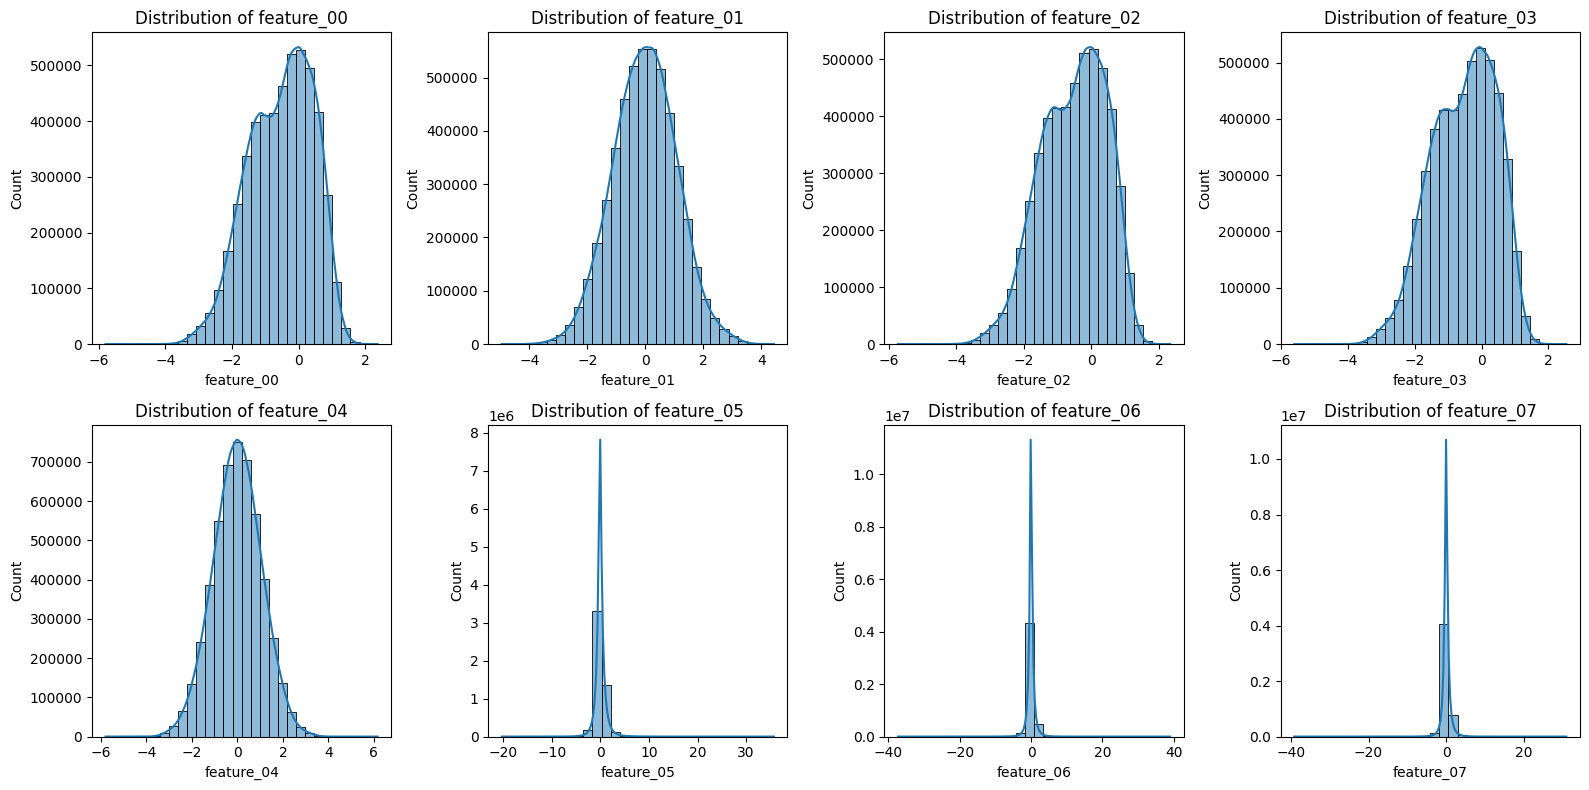

In [15]:
# Original usage (first 5 features)
# plot_feature_distributions(data)

# # Specify custom features
# custom_features = ['feature_00', 'feature_01', 'feature_02']
# plot_feature_distributions(data, features=custom_features)

# More features with different layout
plot_feature_distributions(data, n_features=8, cols_per_row=4, figsize=(16, 4))



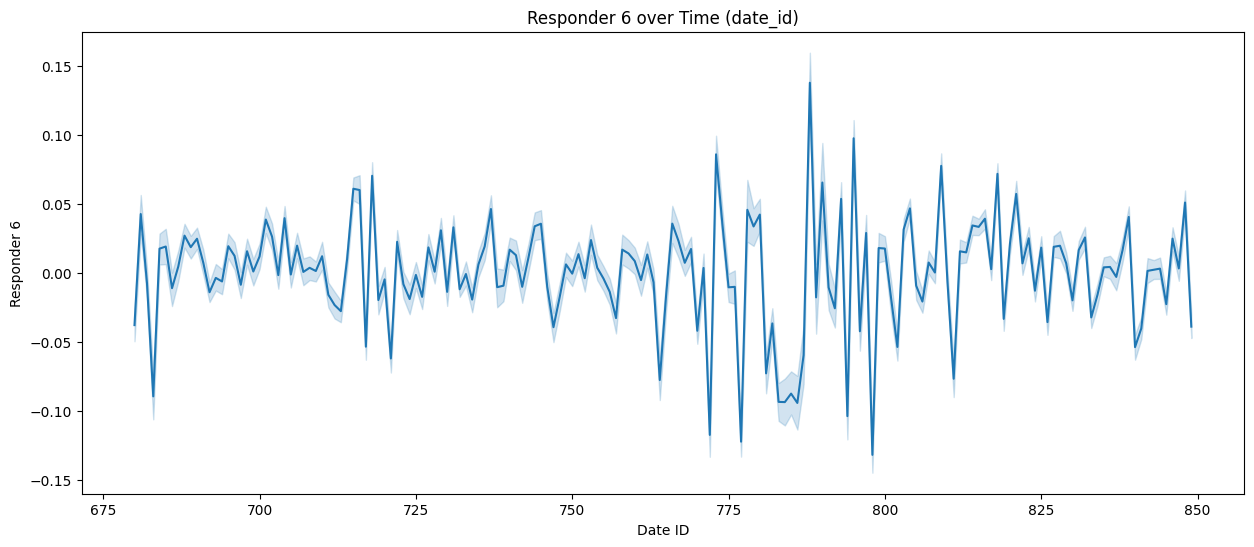

In [36]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date_id', y='responder_6', data=data)
plt.title("Responder 6 over Time (date_id)")
plt.xlabel("Date ID")
plt.ylabel("Responder 6")
plt.show()

='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='
Comprehensive Analysis for Responder 6
='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='

1. Basic Statistical Measures:
--------------------------------------------------
Statistic     Value
     Mean  0.000297
   Median  0.003451
  Std Dev  0.040106
 Skewness -0.551698
 Kurtosis  1.891707
      Min -0.131875
      Max  0.137901
    Range  0.269775
      IQR  0.035603

2. Stationarity Tests:
--------------------------------------------------

Augmented Dickey-Fuller Test:
ADF Statistic: -7.9713
p-value: 0.0000
Critical Values:
	1%: -3.4701
	5%: -2.8790
	10%: -2.5761

KPSS Test:
KPSS Statistic: 0.1330
p-value: 0.1000
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390


C:\Users\wesst\AppData\Local\Temp\ipykernel_17232\635297826.py:65: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna())


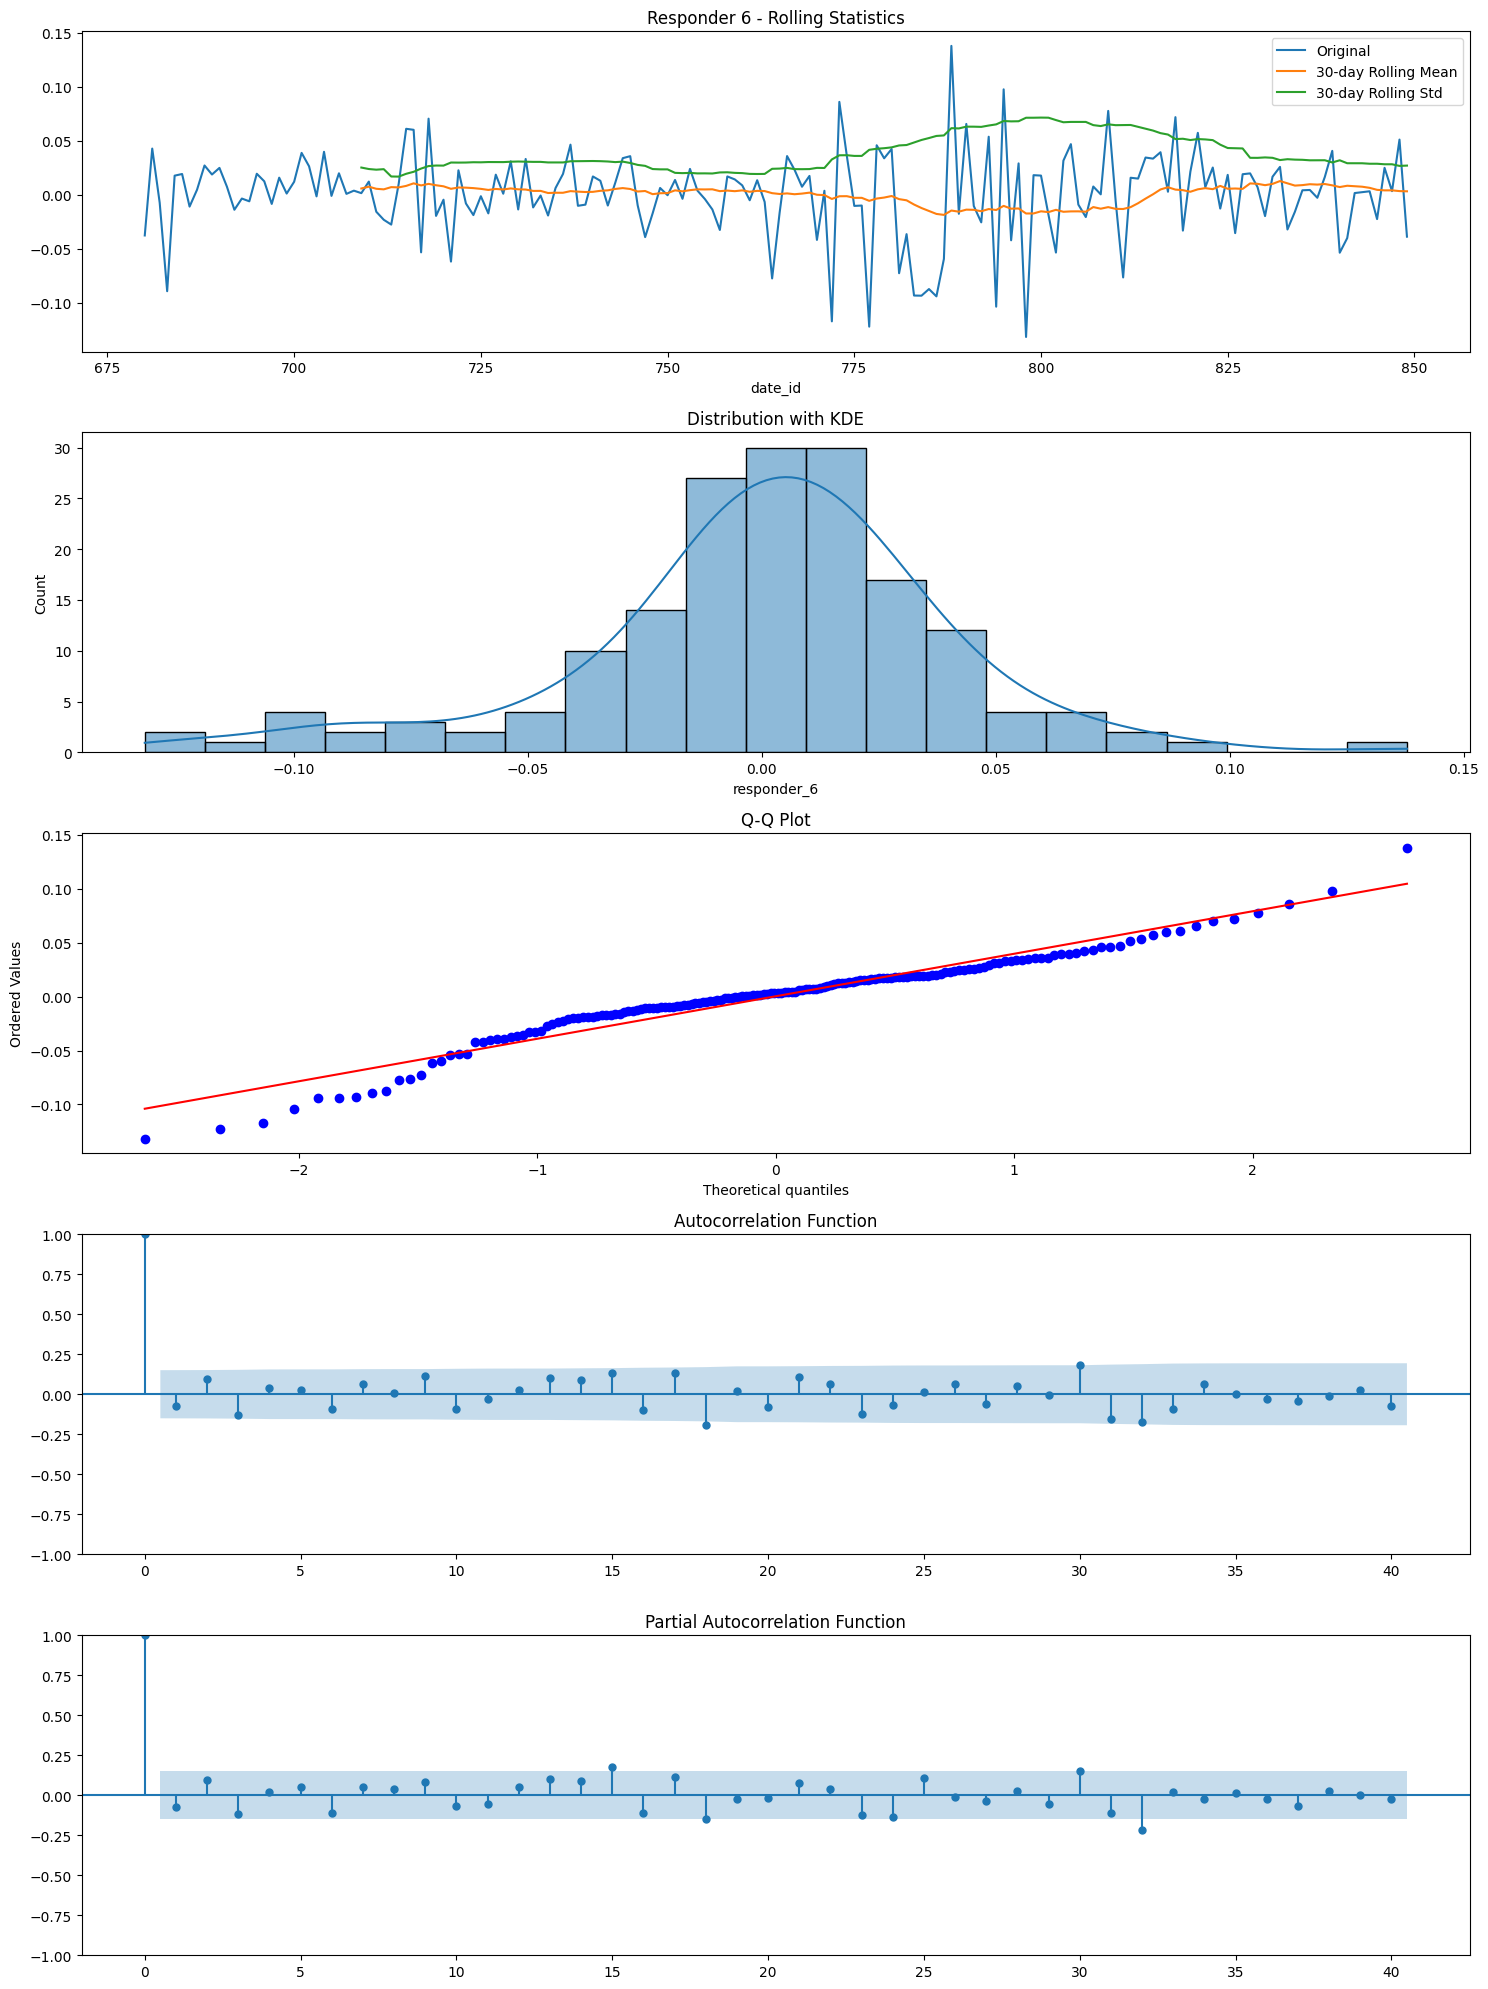

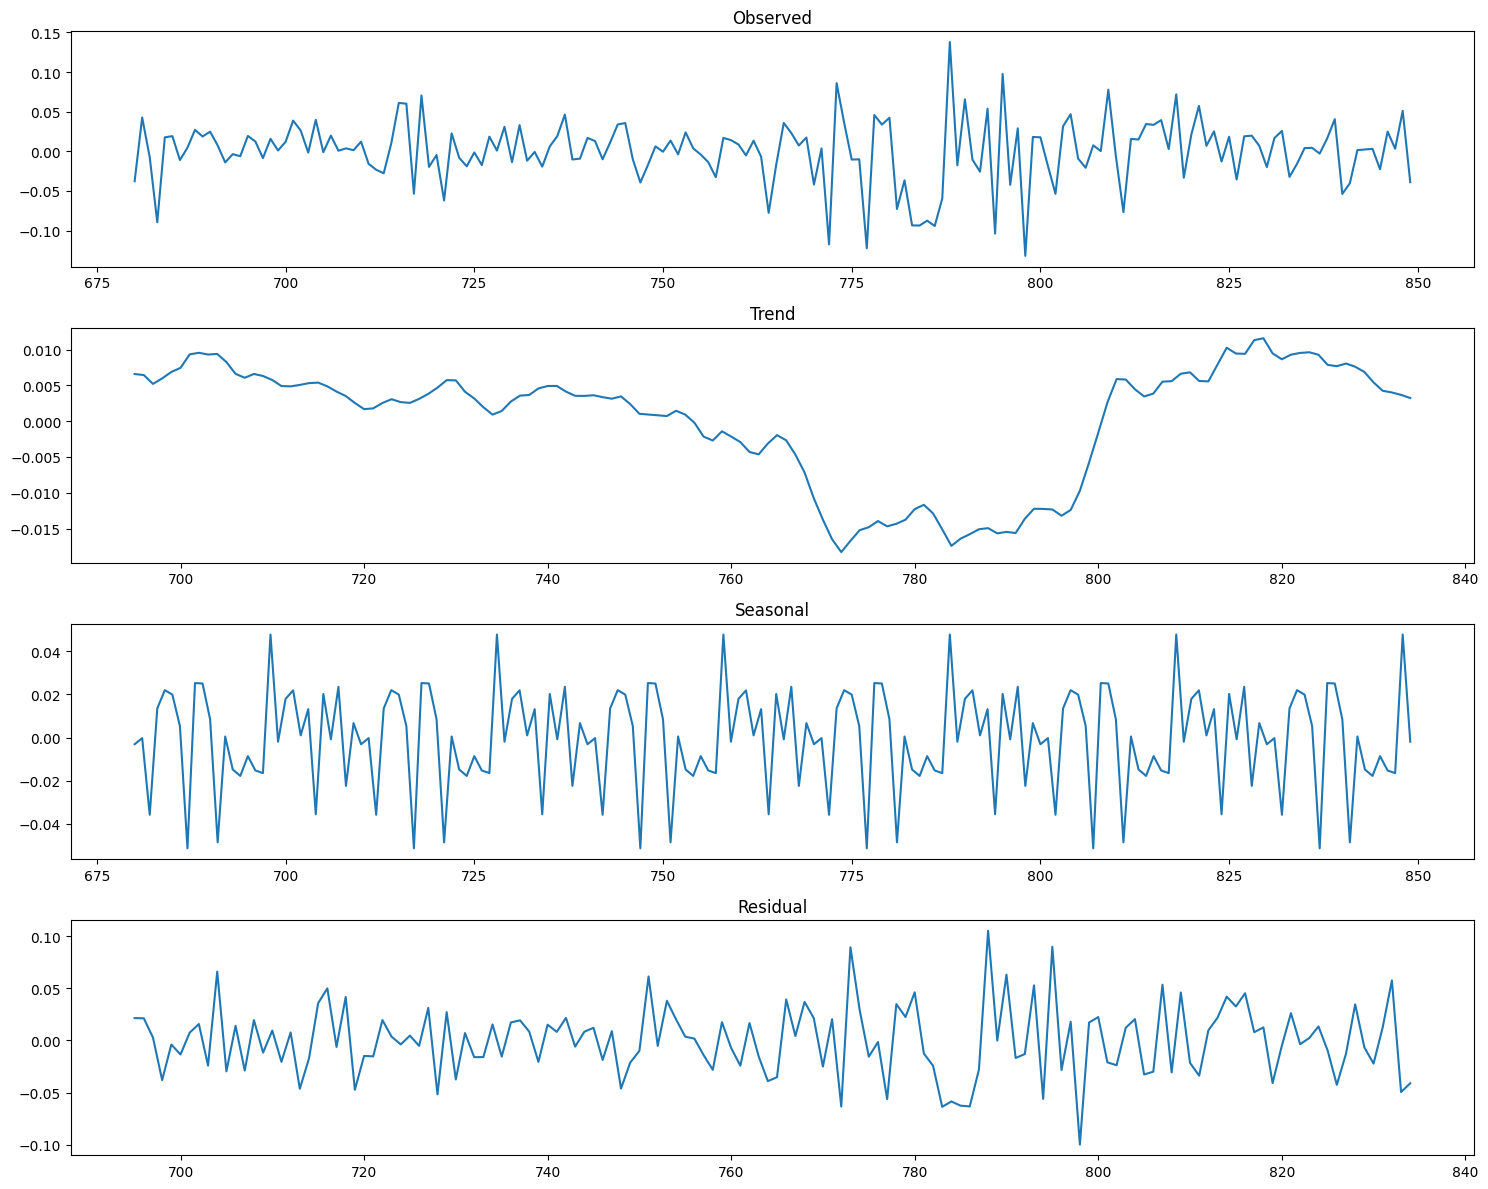


3. Ljung-Box Test for Autocorrelation:
--------------------------------------------------

Ljung-Box Test Results:
Lag 10:
Test Statistic: 12.2237
p-value: 0.2704
Lag 20:
Test Statistic: 33.2089
p-value: 0.0320
Lag 30:
Test Statistic: 49.3216
p-value: 0.0146
Lag 40:
Test Statistic: 65.6946
p-value: 0.0064

5. Summary Interpretation:
--------------------------------------------------

Stationarity:
- Series is stationary according to ADF test
- Series is stationary according to KPSS test

Autocorrelation:
- Significant autocorrelation present

Distribution:
- Series shows significant skewness (-0.55)


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def comprehensive_time_series_analysis(series, title='', seasonal_period=None):
    """
    Perform comprehensive time series analysis including stationarity tests,
    decomposition, and various statistical measures.
    
    Parameters:
    -----------
    series : pandas.Series
        Time series data to analyze
    title : str
        Title for the plots
    seasonal_period : int, optional
        Period for seasonal decomposition (e.g., 12 for monthly data)
    """
    print(f"='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='")
    print(f"Comprehensive Analysis for {title}")
    print(f"='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='='")
    
    # 1. Basic Statistics
    print("\n1. Basic Statistical Measures:")
    print("-" * 50)
    stats_summary = pd.DataFrame({
        'Statistic': [
            'Mean', 'Median', 'Std Dev', 'Skewness', 'Kurtosis',
            'Min', 'Max', 'Range', 'IQR'
        ],
        'Value': [
            series.mean(),
            series.median(),
            series.std(),
            series.skew(),
            series.kurtosis(),
            series.min(),
            series.max(),
            series.max() - series.min(),
            series.quantile(0.75) - series.quantile(0.25)
        ]
    })
    print(stats_summary.to_string(index=False))
    
    # 2. Stationarity Tests
    print("\n2. Stationarity Tests:")
    print("-" * 50)
    
    # ADF Test
    adf_result = adfuller(series.dropna())
    print('\nAugmented Dickey-Fuller Test:')
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    # KPSS Test
    kpss_result = kpss(series.dropna())
    print('\nKPSS Test:')
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print(f'\t{key}: {value:.4f}')
    
    # 3. Visualizations
    fig = plt.figure(figsize=(15, 20))
    
    # Original Series + Rolling Statistics
    ax1 = plt.subplot(511)
    series.plot(ax=ax1, label='Original')
    series.rolling(window=30).mean().plot(ax=ax1, label='30-day Rolling Mean')
    series.rolling(window=30).std().plot(ax=ax1, label='30-day Rolling Std')
    ax1.set_title(f'{title} - Rolling Statistics')
    ax1.legend()
    
    # Histogram and KDE
    ax2 = plt.subplot(512)
    sns.histplot(series, kde=True, ax=ax2)
    ax2.set_title('Distribution with KDE')
    
    # QQ Plot
    ax3 = plt.subplot(513)
    stats.probplot(series, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot')
    
    # ACF/PACF plots
    ax4 = plt.subplot(514)
    plot_acf(series, ax=ax4, lags=40)
    ax4.set_title('Autocorrelation Function')
    
    ax5 = plt.subplot(515)
    plot_pacf(series, ax=ax5, lags=40)
    ax5.set_title('Partial Autocorrelation Function')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Seasonal Decomposition (if seasonal_period is provided)
    if seasonal_period is not None:
        decomposition = seasonal_decompose(series, period=seasonal_period)
        
        plt.figure(figsize=(15, 12))
        plt.subplot(411)
        plt.plot(decomposition.observed)
        plt.title('Observed')
        plt.subplot(412)
        plt.plot(decomposition.trend)
        plt.title('Trend')
        plt.subplot(413)
        plt.plot(decomposition.seasonal)
        plt.title('Seasonal')
        plt.subplot(414)
        plt.plot(decomposition.resid)
        plt.title('Residual')
        plt.tight_layout()
        plt.show()
    
    # 5. Ljung-Box Test for Autocorrelation
    print("\n3. Ljung-Box Test for Autocorrelation:")
    print("-" * 50)
    lb_result = acorr_ljungbox(series, lags=[10, 20, 30, 40])
    print("\nLjung-Box Test Results:")
    for lag, (stat, pval) in enumerate(zip(lb_result['lb_stat'], lb_result['lb_pvalue']), 1):
        print(f"Lag {lag*10}:")
        print(f"Test Statistic: {stat:.4f}")
        print(f"p-value: {pval:.4f}")
    
    # 6. Additional Analysis for Non-Stationarity
    if adf_result[1] > 0.05:
        print("\n4. Analysis of Differences:")
        print("-" * 50)
        
        # First difference
        diff1 = series.diff().dropna()
        adf_diff1 = adfuller(diff1)
        print("\nFirst Difference:")
        print(f"ADF Statistic: {adf_diff1[0]:.4f}")
        print(f"p-value: {adf_diff1[1]:.4f}")
        
        # Second difference if needed
        if adf_diff1[1] > 0.05:
            diff2 = diff1.diff().dropna()
            adf_diff2 = adfuller(diff2)
            print("\nSecond Difference:")
            print(f"ADF Statistic: {adf_diff2[0]:.4f}")
            print(f"p-value: {adf_diff2[1]:.4f}")
    
    # Final Interpretation
    print("\n5. Summary Interpretation:")
    print("-" * 50)
    print("\nStationarity:")
    if adf_result[1] < 0.05:
        print("- Series is stationary according to ADF test")
    else:
        print("- Series is non-stationary according to ADF test")
    
    if kpss_result[1] < 0.05:
        print("- Series is non-stationary according to KPSS test")
    else:
        print("- Series is stationary according to KPSS test")
    
    print("\nAutocorrelation:")
    if any(lb_result['lb_pvalue'] < 0.05):
        print("- Significant autocorrelation present")
    else:
        print("- No significant autocorrelation detected")
    
    print("\nDistribution:")
    if abs(series.skew()) > 0.5:
        print(f"- Series shows significant skewness ({series.skew():.2f})")
    if abs(series.kurtosis()) > 2:
        print(f"- Series shows significant kurtosis ({series.kurtosis():.2f})")

# Usage example:
ts = data.groupby('date_id')['responder_6'].mean()
comprehensive_time_series_analysis(ts, 'Responder 6', seasonal_period=30)  # adjust seasonal_period as needed

In [42]:
data.columns


Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_6

Analyzing features: 100%|██████████| 79/79 [03:47<00:00,  2.89s/it]



=== Quick Stationarity Analysis Summary ===
Total features analyzed: 79
Stationary features: 79 (100.0%)
Non-stationary features: 0 (0.0%)

=== Top 5 Most Non-Stationary Features ===
       feature    adf_pvalue  is_stationary
61  feature_61  4.351996e-08           True
1   feature_01  0.000000e+00           True
0   feature_00  0.000000e+00           True
3   feature_03  0.000000e+00           True
4   feature_04  0.000000e+00           True

Plotting distributions for most non-stationary features...


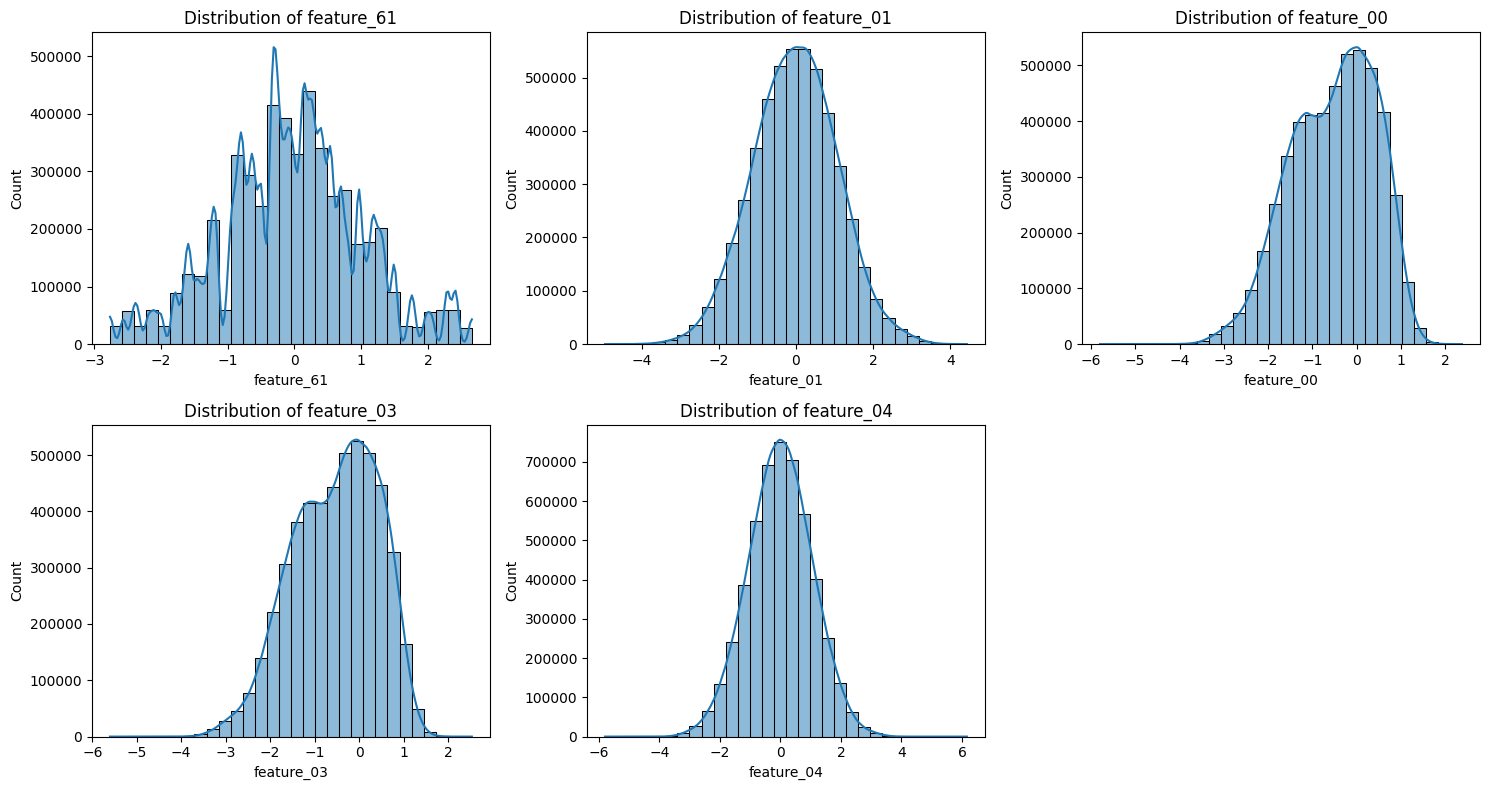


=== Features with High Skewness ===
       feature   skewness
21  feature_21  69.645226
31  feature_31  68.400406
78  feature_78  34.195740
77  feature_77  27.630249
76  feature_76  20.749428

Plotting distributions for most skewed features...


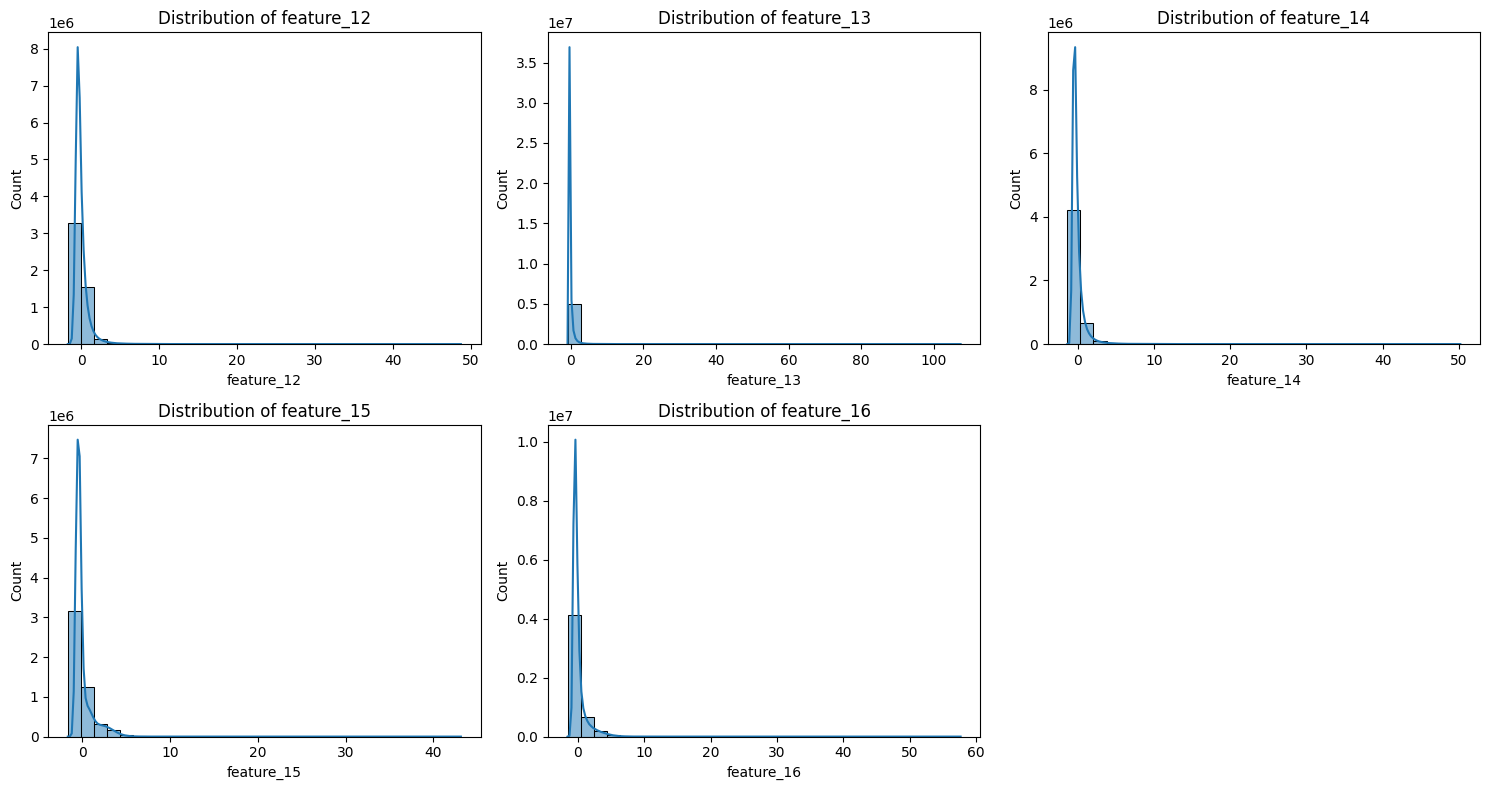


=== Feature Engineering Suggestions ===

Example code for transformations:

# Log transformation
data['feature_21_log'] = np.log1p(data['feature_21'])

# Box-Cox transformation
from scipy import stats
data['feature_21_boxcox'] = stats.boxcox(data['feature_21'] - data['feature_21'].min() + 1)[0]

# Quantile transformation
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
data['feature_21_quantile'] = qt.fit_transform(data[['feature_21']])
        

For highly skewed features ['feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16']:
1. Log transformation: np.log1p(x)
2. Box-Cox transformation
3. Quantile transformation


In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

def analyze_feature_stationarity_light(data, feature_columns=None, significance_level=0.05):
    """
    Lighter version of stationarity analysis using only ADF test and basic stats
    """
    if feature_columns is None:
        feature_columns = data.select_dtypes(include=[np.number]).columns
    
    results = []
    basic_stats = data[feature_columns].agg(['mean', 'std', 'skew']).T
    
    for col in tqdm(feature_columns, desc="Analyzing features"):
        series = data[col].dropna()
        
        if len(series) < 10 or series.std() == 0:
            continue
            
        try:
            adf_stat, adf_pval, _, _, _, _ = adfuller(series, maxlag=1)
            stats = basic_stats.loc[col]
            
            results.append({
                'feature': col,
                'adf_statistic': adf_stat,
                'adf_pvalue': adf_pval,
                'is_stationary': adf_pval < significance_level,
                'mean': stats['mean'],
                'std': stats['std'],
                'skewness': stats['skew']
            })
            
        except Exception as e:
            print(f"Error analyzing {col}: {str(e)}")
            continue
    
    return pd.DataFrame(results)

def print_quick_summary(results_df, data):
    """Print a quick summary of the stationarity analysis"""
    total_features = len(results_df)
    stationary_count = sum(results_df['is_stationary'])
    
    print("\n=== Quick Stationarity Analysis Summary ===")
    print(f"Total features analyzed: {total_features}")
    print(f"Stationary features: {stationary_count} ({stationary_count/total_features*100:.1f}%)")
    print(f"Non-stationary features: {total_features - stationary_count} "
          f"({(total_features-stationary_count)/total_features*100:.1f}%)")
    
    # Most non-stationary features
    print("\n=== Top 5 Most Non-Stationary Features ===")
    non_stationary = results_df.sort_values('adf_pvalue', ascending=False).head(5)
    print(non_stationary[['feature', 'adf_pvalue', 'is_stationary']].to_string())
    
    print("\nPlotting distributions for most non-stationary features...")
    plot_feature_distributions(data, features=non_stationary['feature'].tolist(), 
                             cols_per_row=3, figsize=(15, 4))
    
    # Features with high skewness
    skewed_features = results_df[abs(results_df['skewness']) > 2]
    if len(skewed_features) > 0:
        print("\n=== Features with High Skewness ===")
        print(skewed_features[['feature', 'skewness']]
              .sort_values('skewness', key=abs, ascending=False)
              .head(5)
              .to_string())
        
        print("\nPlotting distributions for most skewed features...")
        plot_feature_distributions(data, features=skewed_features['feature'].head().tolist(), 
                                 cols_per_row=3, figsize=(15, 4))

    # Generate feature engineering suggestions based on analysis
    print("\n=== Feature Engineering Suggestions ===")
    suggestions = []
    
    if len(skewed_features) > 0:
        skewed_list = skewed_features['feature'].head().tolist()
        suggestions.append(f"\nFor highly skewed features {skewed_list}:")
        suggestions.append("1. Log transformation: np.log1p(x)")
        suggestions.append("2. Box-Cox transformation")
        suggestions.append("3. Quantile transformation")
        
        # Example code
        print("\nExample code for transformations:")
        print("""
# Log transformation
data['feature_21_log'] = np.log1p(data['feature_21'])

# Box-Cox transformation
from scipy import stats
data['feature_21_boxcox'] = stats.boxcox(data['feature_21'] - data['feature_21'].min() + 1)[0]

# Quantile transformation
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
data['feature_21_quantile'] = qt.fit_transform(data[['feature_21']])
        """)
    
    if not all(results_df['is_stationary']):
        suggestions.append("\nFor non-stationary features:")
        suggestions.append("1. First differences: .diff()")
        suggestions.append("2. Percentage changes: .pct_change()")
        suggestions.append("3. Rolling statistics: .rolling(window=N).mean()")
    
    for suggestion in suggestions:
        print(suggestion)

# Example usage
feature_cols = [col for col in data.columns if col.startswith('feature_')]
results = analyze_feature_stationarity_light(data, feature_cols)
print_quick_summary(results, data)

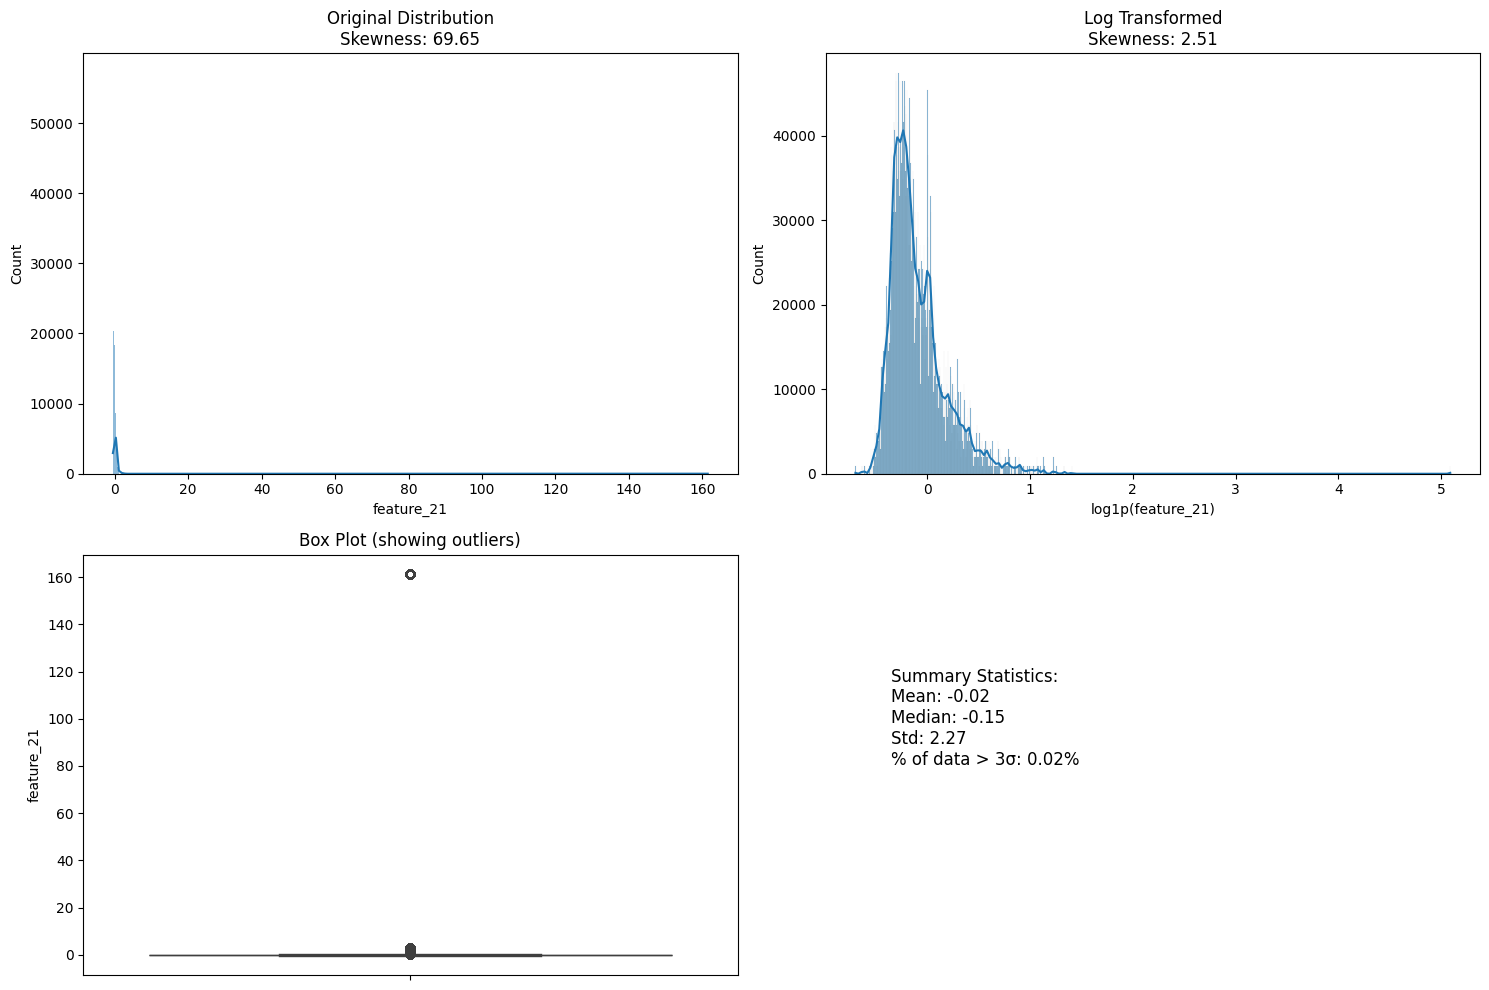


Detailed Analysis for feature_21:
- 0.0% of values are zero
- 99% of values are below: 1.33
- Maximum value is: 161.49


0         -0.248027
1         -0.066530
2         -0.277063
3          0.004974
4          0.023310
             ...   
5022947   -0.273023
5022948    0.212768
5022949   -0.076587
5022950    0.264261
5022951   -0.159324
Name: feature_21, Length: 5022952, dtype: float32

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_skewed_feature(data, feature_name):
    """Analyze and visualize a skewed feature with various transformations"""
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Original distribution
    sns.histplot(data[feature_name], kde=True, ax=axs[0,0])
    axs[0,0].set_title(f'Original Distribution\nSkewness: {data[feature_name].skew():.2f}')
    axs[0,0].set_xlabel(feature_name)
    
    # Log transformation
    log_data = np.log1p(data[feature_name])
    sns.histplot(log_data, kde=True, ax=axs[0,1])
    axs[0,1].set_title(f'Log Transformed\nSkewness: {log_data.skew():.2f}')
    axs[0,1].set_xlabel(f'log1p({feature_name})')
    
    # Box plot
    sns.boxplot(y=data[feature_name], ax=axs[1,0])
    axs[1,0].set_title('Box Plot (showing outliers)')
    
    # Print summary statistics
    stats = data[feature_name].describe()
    summary = (f"Summary Statistics:\n"
              f"Mean: {stats['mean']:.2f}\n"
              f"Median: {stats['50%']:.2f}\n"
              f"Std: {stats['std']:.2f}\n"
              f"% of data > 3σ: {(len(data[data[feature_name] > stats['mean'] + 3*stats['std']])/len(data)*100):.2f}%")
    axs[1,1].text(0.1, 0.5, summary, fontsize=12)
    axs[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and print additional metrics
    print(f"\nDetailed Analysis for {feature_name}:")
    print(f"- {(data[feature_name] == 0).mean()*100:.1f}% of values are zero")
    print(f"- 99% of values are below: {data[feature_name].quantile(0.99):.2f}")
    print(f"- Maximum value is: {data[feature_name].max():.2f}")
    
    return log_data

# Analyze the most skewed feature
analyze_skewed_feature(data, 'feature_21')